# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=eeef6a4cc3386ee4037b7eb6d18349dd37acbd3e6877de24e7efdea6f02a00c0
  Stored in directory: c:\users\tarik\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
!pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [66]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [67]:
data_iterator = data.as_numpy_iterator()

In [68]:
batch = data_iterator.next()

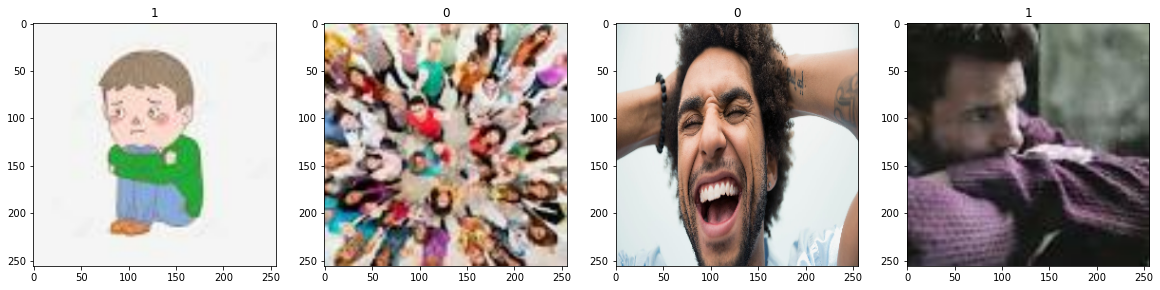

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [70]:
data = data.map(lambda x,y: (x/255, y))

In [71]:
data.as_numpy_iterator().next()

(array([[[[0.06470875, 0.06470875, 0.06470875],
          [0.06459673, 0.06459673, 0.06459673],
          [0.07411344, 0.07411344, 0.07411344],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.07087259, 0.07087259, 0.07087259],
          [0.07576115, 0.07576115, 0.07576115],
          [0.08112745, 0.08112745, 0.08112745],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.08161765, 0.08161765, 0.08161765],
          [0.0836397 , 0.0836397 , 0.0836397 ],
          [0.08877623, 0.08877623, 0.08877623],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.08373544, 0.08373544, 0.08373544],
          [0.08269

# 5. Split Data

In [72]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [73]:
train_size

7

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [75]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [12]:
model = Sequential()

In [78]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [81]:
logdir='logs'

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [83]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 4s 338ms/step - loss: 0.8471 - accuracy: 0.4688 - val_loss: 0.6580 - val_accuracy: 0.7656
Epoch 2/20
7/7 [==============================] - 3s 311ms/step - loss: 0.6643 - accuracy: 0.5804 - val_loss: 0.7019 - val_accuracy: 0.3438
Epoch 3/20
7/7 [==============================] - 3s 310ms/step - loss: 0.6164 - accuracy: 0.6562 - val_loss: 0.5446 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 3s 310ms/step - loss: 0.5362 - accuracy: 0.7321 - val_loss: 0.5722 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 3s 310ms/step - loss: 0.4867 - accuracy: 0.7857 - val_loss: 0.3943 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 3s 310ms/step - loss: 0.3881 - accuracy: 0.8884 - val_loss: 0.2646 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 3s 311ms/step - loss: 0.3097 - accuracy: 0.8973 - val_loss: 0.2271 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

# 8. Plot Performance

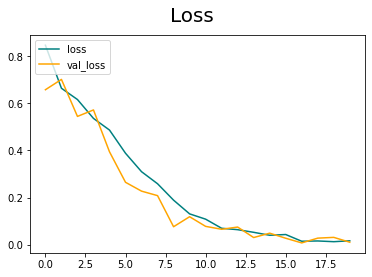

In [84]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

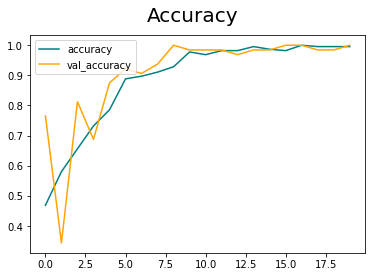

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 68ms/step


In [89]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [4]:
import cv2

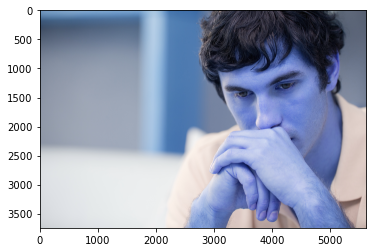

In [7]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

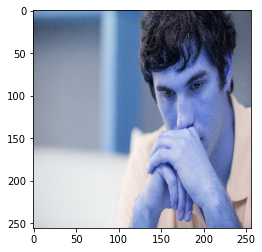

In [8]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [9]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'model' is not defined

In [108]:
yhat

array([[0.98387307]], dtype=float32)

In [109]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join('models','imageclassifier.h5'))

In [112]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [113]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


array([[0.98387307]], dtype=float32)